<a href="https://colab.research.google.com/github/Snehalshetye18/Gonnarocksoon18/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#conda install -c anaconda graphviz
#conda install -c conda-forge pydotplus
import numpy as np
import pandas as pd
dataset=pd.read_excel("dt.xlsx")
dataset.head()


,Age,Incomr,Student,Credit_rating,Buys_computer
0,<30,high,no,fair,no
1,<30,high,no,excellent,no
2,30-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [3]:
X=dataset.iloc[:,:-1] #feature
feature_cols=['age','income','student','credit_rating']
Y=dataset.iloc[:,4].values #classtables

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)

from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best')
X
regressor.fit(X,Y) #Training of classifier

X_in=np.array([2,0,1,1]) #age= 30-40 income=low student=no credit_rating=excellent
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)


Prediction:  ['yes']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [4]:
X

,Age,Incomr,Student,Credit_rating
0,1,0,0,1
1,1,0,0,0
2,0,0,0,1
3,2,2,0,1
4,2,1,1,1
5,2,1,1,0
6,0,1,1,0
7,1,2,0,1
8,1,1,1,1
9,2,2,1,1


In [5]:
X_in=np.array([1,3,0,0]) #age= 30-40 income=low student=no credit_rating=excellent
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)


Prediction:  ['no']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


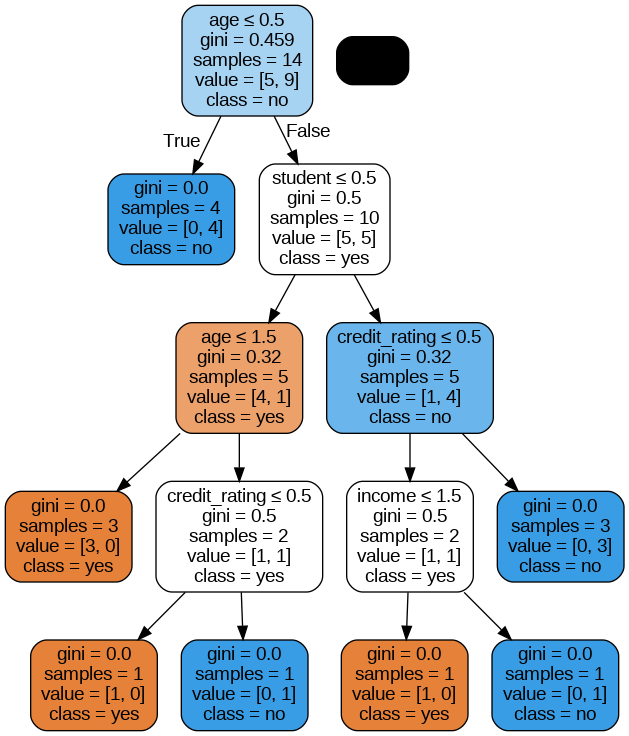

In [8]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['age','income','student','credit_rating']
export_graphviz(regressor,out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['yes','no'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())